<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 5

### Problem 0 (3 points)

## Part 1: Logistic and Cross Entropy

### Problem 1.1 (Exam Style)

h(x) = \left\{\begin{array}{ll}
? & {\text{for } ?} \\
? & {\text{for } ?} \\
? & {\text{for } ?} \\
? & {\text{for } ?} \\
? & {\text{for } ?} \\
\end{array}\right.

ℓ(𝑦,𝑎)=ℓ𝑥𝑒(𝑦,𝑓(𝑎))

= -𝑦log((1 + $e^{-a}$) ^ -1) + (1 − 𝑦)log(1 - (1/(1 + $e^{-a}$))

= 𝑦log(1 + $e^{-a}$) - (1 − 𝑦)log((1 + $e^{-a}$) ^ -1)

= 𝑦log(1 + $e^{-a}$) + (1 − 𝑦)log( 1 + $e^{a}$)

### Problem 1.2 (Exam Style)


ℓ′(𝑦,𝑎) = (-y$e^{-a}$)/(1 + $e^{-a}$) + ((1 - y) * ($e^a$))/(1 + $e^a$)

= (-y * 1)/$e^{-a}$(1 + $e^{-a}$) + ((1 - y) * $e^a$)/(1 + $e^a$)

= (-y)/(1 + $e^a$) + ((1 - y) * $e^a$)/(1 + $e^a$)

= ($e^a$ - y$e^a$ - y)/(1 + $e^a$)



ℓ″(𝑦,𝑎) = ((($e^a$ - y$e^a$) * (1 + $e^a$)) - (($e^a$ - y$e^a$ - y) * $e^a$)) / (1 + $e^a$)^2

=($e^a$ - y$e^a$ + $e^{2a}$ + -y$e^{2a}$ - $e^{2a}$ + -y$e^{2a}$ + y$e^a$)/(1 + $e^{2a}$)^2

= $e^a$/(1 + $e^a$)^2

### Problem 1.3

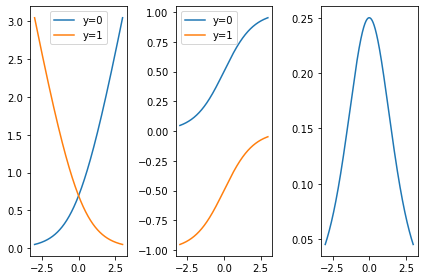

In [103]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-3, 3, 1000)

def L(a,y):
    return y*np.log(1+np.exp(-a)) + (1-y)*np.log(1+np.exp(a))
def Lprime(a,y):
    return ((np.exp(a)-y*np.exp(a))-y)/(1+np.exp(a))
def Ldoubleprime(a):
    return np.exp(a)/(1+np.exp(a))**2

fig, axes = plt.subplots(1, 3)

axes[0].plot(a, L(a,0), label='y=0')
axes[0].plot(a, L(a,1), label='y=1')
axes[0].legend()

axes[1].plot(a, Lprime(a,0), label='y=0')
axes[1].plot(a, Lprime(a,1), label='y=1')
axes[1].legend()

axes[2].plot(a, Ldoubleprime(a))

plt.tight_layout()
plt.show()

## Part 2: Automatic Differentiation 

In [104]:
import autograd.numpy as anp
from autograd import grad

### Problem 2.1

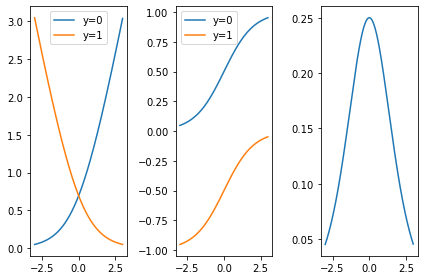

In [105]:
x_list = [.01 * x for x in range(-300, 300)]

def ag_ell_0(a):
    return anp.log(1+anp.exp(a))
def ag_ell_1(a):
    return anp.log(1+anp.exp(-a))

d_ag_ell_0 = grad(ag_ell_0)
d_ag_ell_1 = grad(ag_ell_1)
d_2_ell = grad(d_ag_ell_0)
fig, axes = plt.subplots(1, 3)

axes[0].plot(x_list, [ag_ell_0(x) for x in x_list], label='y=0')
axes[0].plot(x_list, [ag_ell_1(x) for x in x_list], label='y=1')
axes[0].legend()

axes[1].plot(x_list, [d_ag_ell_0(x) for x in x_list], label='y=0')
axes[1].plot(x_list, [d_ag_ell_1(x) for x in x_list], label='y=1')
axes[1].legend()

axes[2].plot(x_list, [d_2_ell(x) for x in x_list])

plt.tight_layout()
plt.show()

## Part 3: Logistic Regression Classifiers 

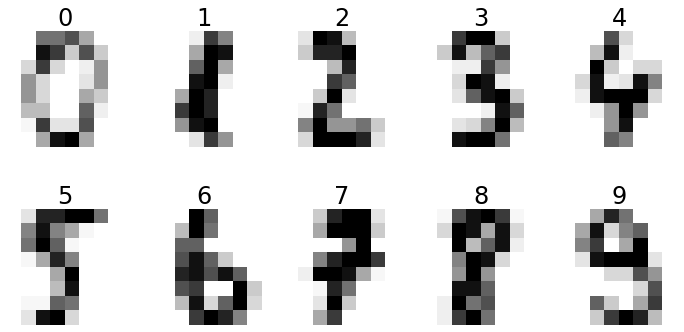

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

file_name = 'digits.pkl'
with open(file_name, 'rb') as file:
    sets = pickle.load(file)
training_set, test_set = sets['training'], sets['test']


plt.figure(figsize=(12, 6))
for digit in range(10):
    plt.subplot(2, 5, digit+1)
    index = np.argwhere(training_set['y'] == digit)[0][0]
    plt.imshow(training_set['x'][index].reshape((8, 8)), cmap='Greys')
    plt.axis('off')
    plt.title('{}'.format(digit), fontsize=24)
plt.show()

In [107]:
def evaluate(h, train, test, name):
    def error_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (1 - predictor.score(x, y)) * 100
    
    f = '{:s}: training error rate is {:.4f} percent on {} samples,' + \
        '\n\ttest error rate is {:.4f} percent on {} samples'
    info = (name, error_rate(h, train), len(train['y']), error_rate(h, test), len(test['y']))
    print(f.format(*info))

### Problem 3.1

In [108]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(C=1e5, solver='lbfgs', 
                                max_iter=10000, random_state=0)

h=logisticRegr.fit(training_set['x'], training_set['y'])

In [109]:
evaluate(h, training_set, test_set, name = 'logistic-regression classifier')

logistic-regression classifier: training error rate is 0.0000 percent on 1078 samples,
	test error rate is 3.4771 percent on 719 samples


### Problem 3.2 (Exam Style)

Yes we can tell that the training set is linearly separable because the error rate we get is zero, meaning there does exist a linear classifier that can separate the data.

### Problem 3.3 (Exam Style)

We cannot tell if the test set is linearly separable because we did not create the classifier from the test set, we used the training set. To check if the test set data is linearly separable, we would need to fit a new logistic regressor classifier to the test set and then evaluate the error. As we can see from the code below, the test set is linearly separable because there exists a classifier that can separate the data with zero error.

In [110]:
logisticRegr1 = LogisticRegression(C=1e5, solver='lbfgs', 
                                max_iter=10000, random_state=0)

h1=logisticRegr1.fit(test_set['x'], test_set['y'])
evaluate(h1, training_set, test_set, name = 'logistic-regression classifier')

logistic-regression classifier: training error rate is 5.9369 percent on 1078 samples,
	test error rate is 0.0000 percent on 719 samples


### Problem 3.4 (Exam Style)

There is some overfitting with the classifier because the test set error rate isn't zero, but the error rate is not incredibly large at 3.4771 percent, so the classifier does generalize somewhat to new data.

### Problem 3.5

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

predictions = logisticRegr.predict(test_set['x'])
predictions1 = logisticRegr.predict(training_set['x'])

confuse= metrics.confusion_matrix(test_set['y'], predictions) 
confuse1= metrics.confusion_matrix(training_set['y'], predictions1) 

print("Test Set Confusion Matrix")
print(confuse)
print("")
print("")
print("Training Set Confusion Matrix")
print(confuse1)


Test Set Confusion Matrix
[[69  0  1  0  0  0  0  0  0  0]
 [ 0 67  0  0  1  0  0  1  0  0]
 [ 0  0 79  1  0  0  0  0  0  0]
 [ 0  0  2 76  0  0  0  0  1  1]
 [ 0  0  0  0 53  0  0  2  0  1]
 [ 0  0  1  0  0 71  0  0  0  0]
 [ 0  2  0  0  0  0 78  0  1  0]
 [ 1  0  0  1  0  0  0 75  0  0]
 [ 0  2  0  0  0  0  1  0 59  3]
 [ 0  0  0  1  0  0  0  0  1 67]]


Training Set Confusion Matrix
[[108   0   0   0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0]
 [  0   0  97   0   0   0   0   0   0   0]
 [  0   0   0 103   0   0   0   0   0   0]
 [  0   0   0   0 125   0   0   0   0   0]
 [  0   0   0   0   0 110   0   0   0   0]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0   0 102   0   0]
 [  0   0   0   0   0   0   0   0 109   0]
 [  0   0   0   0   0   0   0   0   0 111]]


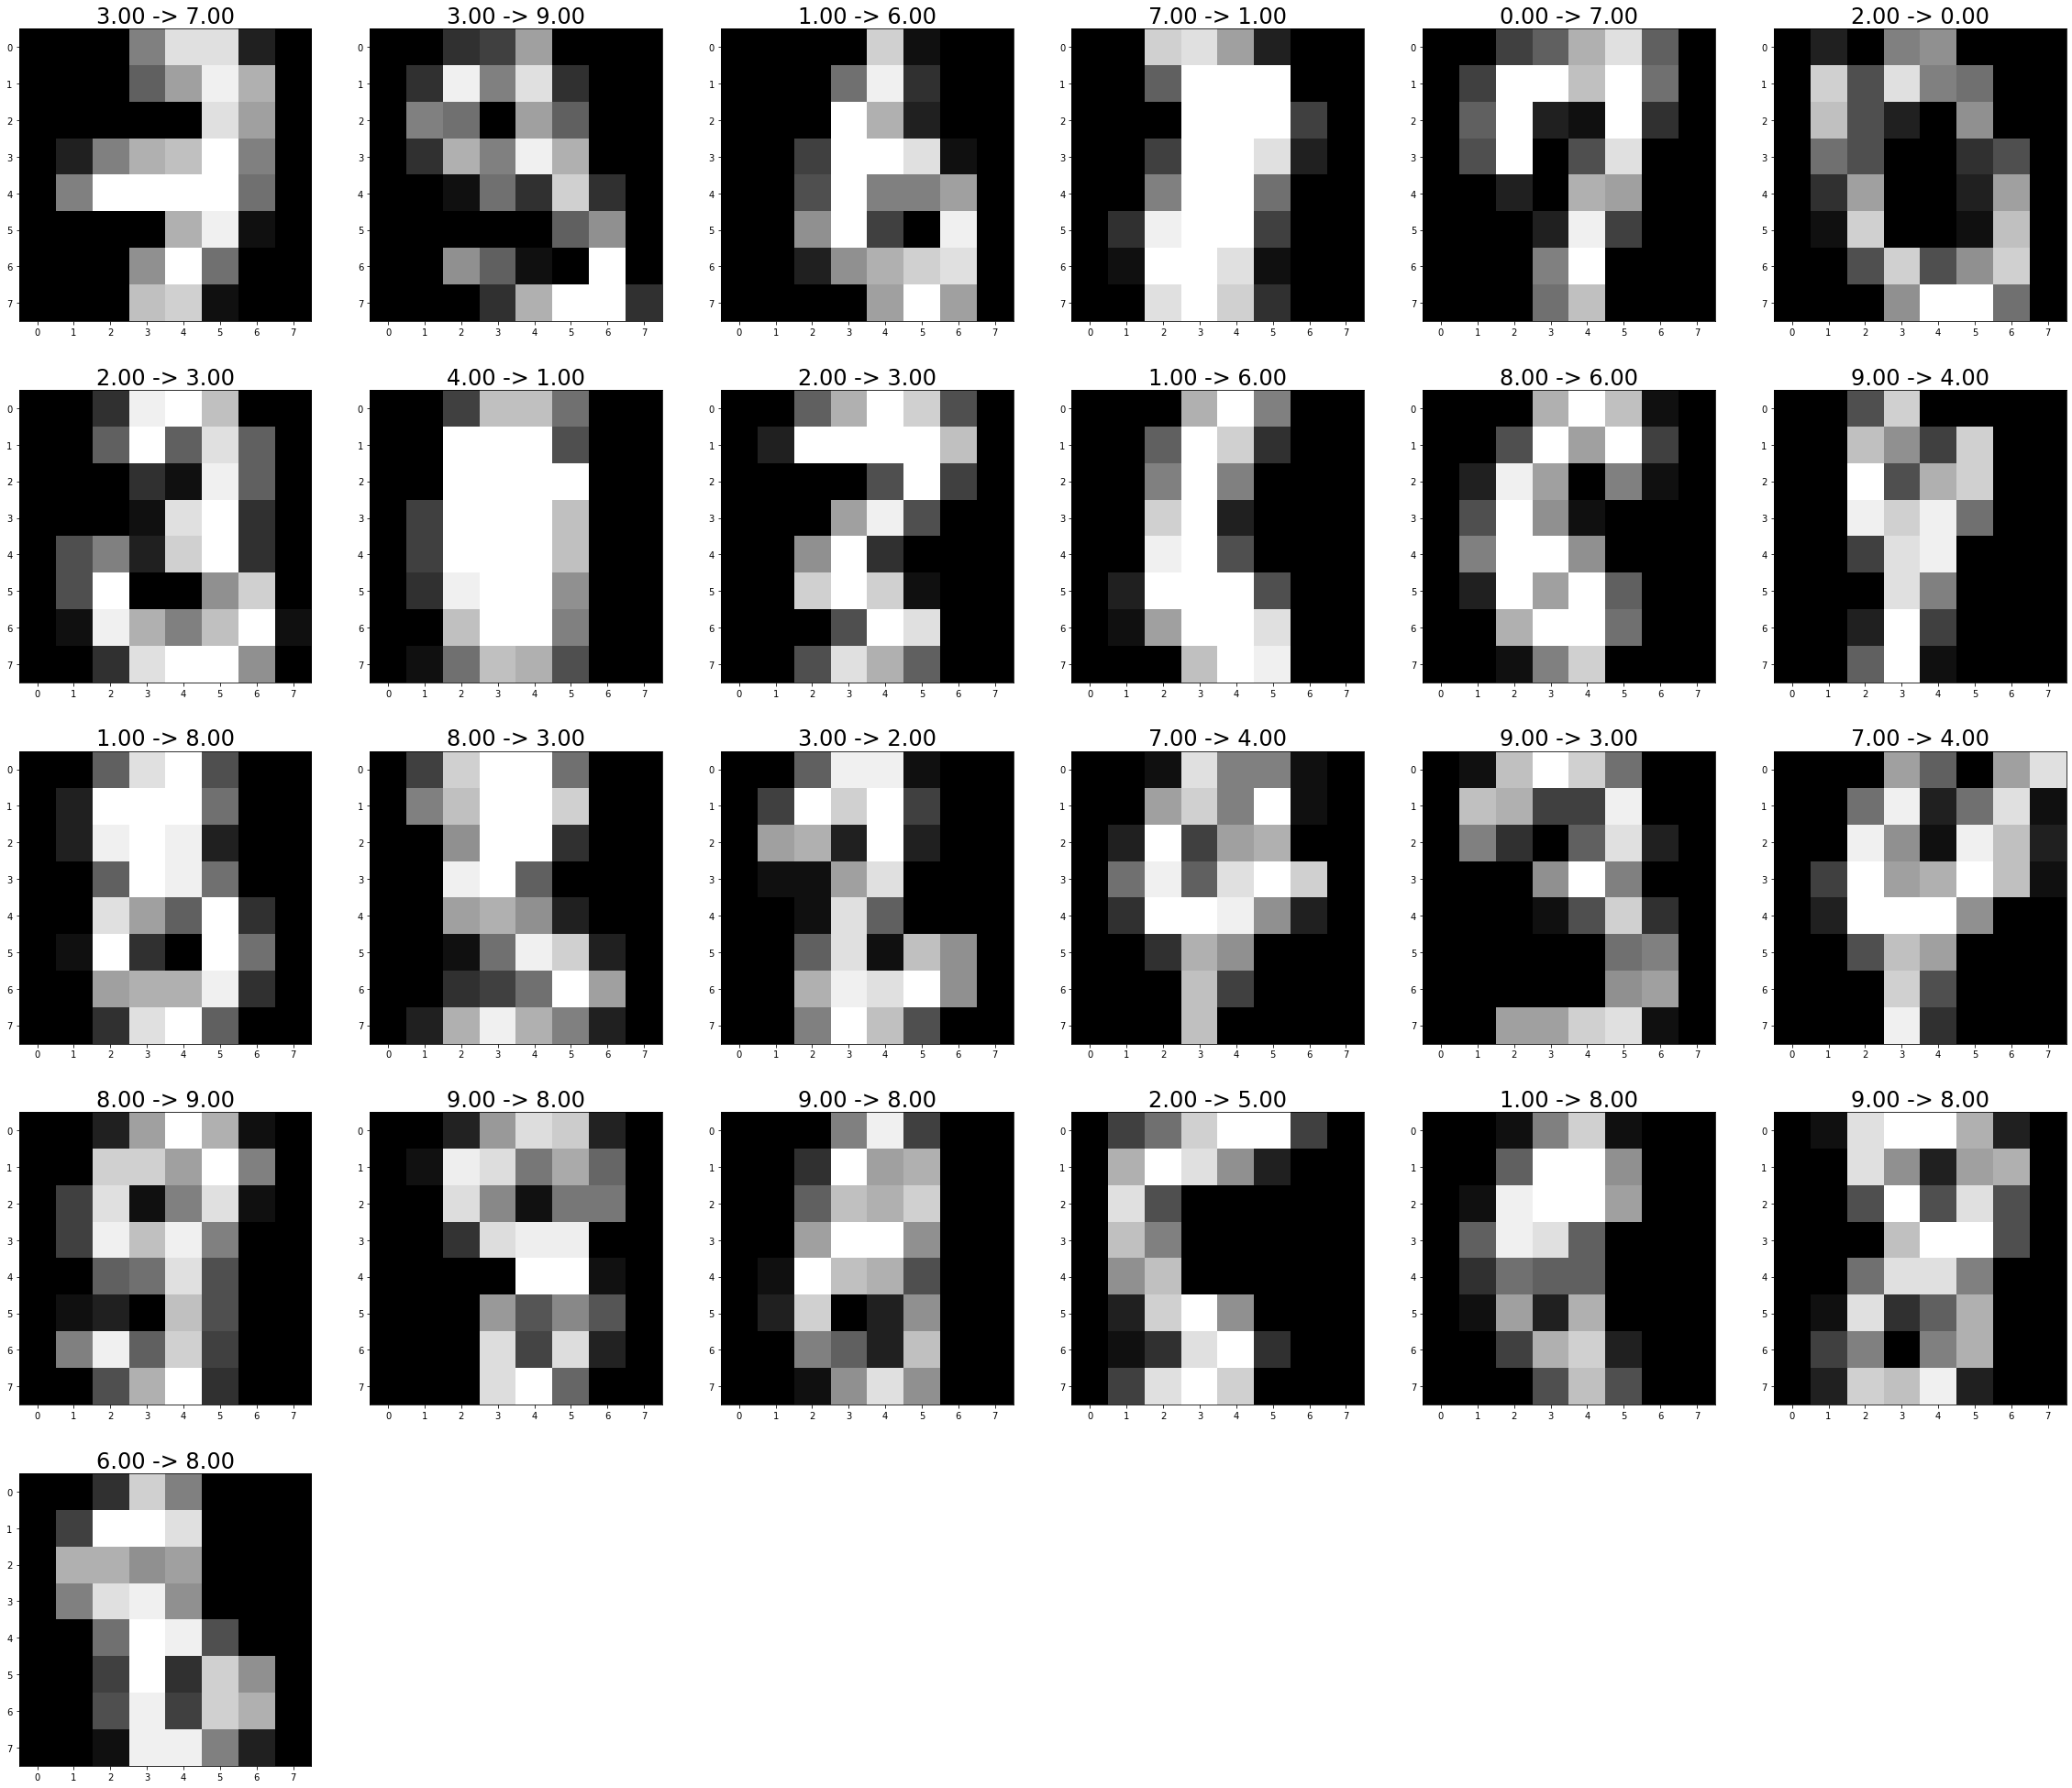

In [112]:
index = 0
realpic = test_set['x']
realy = test_set['y']
misclassifiedIndexes = []

for i in range(predictions.size):
     if (realy[i] != predictions[i]): 
        misclassifiedIndexes.append(i)
    #index +=1
    
if(len(misclassifiedIndexes)>30):
    leftover=len(misclassifiedIndexes)-30
    print("Misclassified images not shown: " + leftover)
    
plt.figure(figsize=(40,35))
for plotIndex, badIndex in enumerate(misclassifiedIndexes):
    plt.subplot(5, 6, plotIndex + 1)
    plt.imshow(np.reshape(realpic[badIndex], (8,8)), cmap=plt.cm.gray)
    txt="{predict:.2f} -> {actual:.2f}"   
    plt.title(txt.format(predict=predictions[badIndex], 
                         actual=realy[badIndex]), fontsize = 24)

### Problem 3.6 (Exam Style)

Someone could probably classify row 3 column 2 as a 3 and row 3 column 3 as a 2. Row 3 column 4 and row 5 column 4 are much less easy to identify.